# Practical on Decision Trees with Python

For this lab, you will experiment with a simple machine learning algorithm, the decisions trees. The materials on moodle include a good description of how decision trees work. This practical will demonstrate how to load data, train a classifier and tested in practice. 

## Dataset
We will use the dataset zoo.data (available from moodle or from this link: http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/ )
The dataset includes data that describe animals, in the following way:

### Predictors
1. animal name: Unique for each instance
2. hair: Boolean
3. feathers: Boolean
4. eggs: Boolean
5. milk: Boolean
6. airborne: Boolean
7. aquatic: Boolean
8. predator: Boolean
9. toothed: Boolean
10. backbone: Boolean
11. breathes: Boolean
12. venomous: Boolean
13. fins: Boolean
14. legs: Numeric (set of values: {0,2,4,5,6,8})
15. tail: Boolean
16. domestic: Boolean
17. catsize: Boolean

### Target/ Label
18. type: Numeric (integer values in range [1,7]) that correspond to following classes. 

1 -- aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf

2 -- chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren

3 -- pitviper, seasnake, slowworm, tortoise, tuatara

4 -- bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna

5 -- frog, frog, newt, toad

6 -- flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp

7 -- clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
# set local path where notebooks and data folders are located
path = "/content/gdrive/My Drive/DW_data/"
data_path = path + "zoo.data"
print(data_path)

/content/gdrive/My Drive/DW_data/zoo.data


## Step 1: Import libraries and loading the data

We will use the sklearn implementation of decision trees: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 

#Import the dataset (dropped the first column with the animal names)
dataset = pd.read_csv(data_path, header=None, usecols=[*range(1, 18)])


In [9]:
#to view the dataset
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Step 2: Split data into training and test sets

In order to be able to evaluate the developed decision tree, we will need to test it on unseen data, i.e. data that hasn't been used for training. For this example, the dataset will be split into 80% training data and 20% testing data (please note that below the "80" corresponds to the 80 first examples, rather than 80% because there are only 100 examples in our zoo.data dataset. 

In [0]:
#Split the data into a training and a testing set
train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_labels = dataset.iloc[:80,-1]
test_labels = dataset.iloc[80:,-1]

## Step 3: Training the decision trees

Notice that entropy has been chosen as the criterion. This is because other decision trees have different criteria for splitting the data and creating the tree. 

In [0]:
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_labels)

## Step 4: Evaluation
    
Accuracy, i.e. the percentage of correctly classified instances of the test set, will be used for evaluation. 

In [12]:
#The accuracy is then calculated through the score function offered by sklearn
print("The prediction accuracy is: ",tree.score(test_features,test_labels)*100,"%")

The prediction accuracy is:  80.95238095238095 %


In [0]:
#If you need to use the trained classifier in an actual application, you can use the function "predict"
#to get the prediction on the test set as follows
prediction = tree.predict(test_features)

## Visualising the tree

It would be also useful to see the tree that was built through the data. 




/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


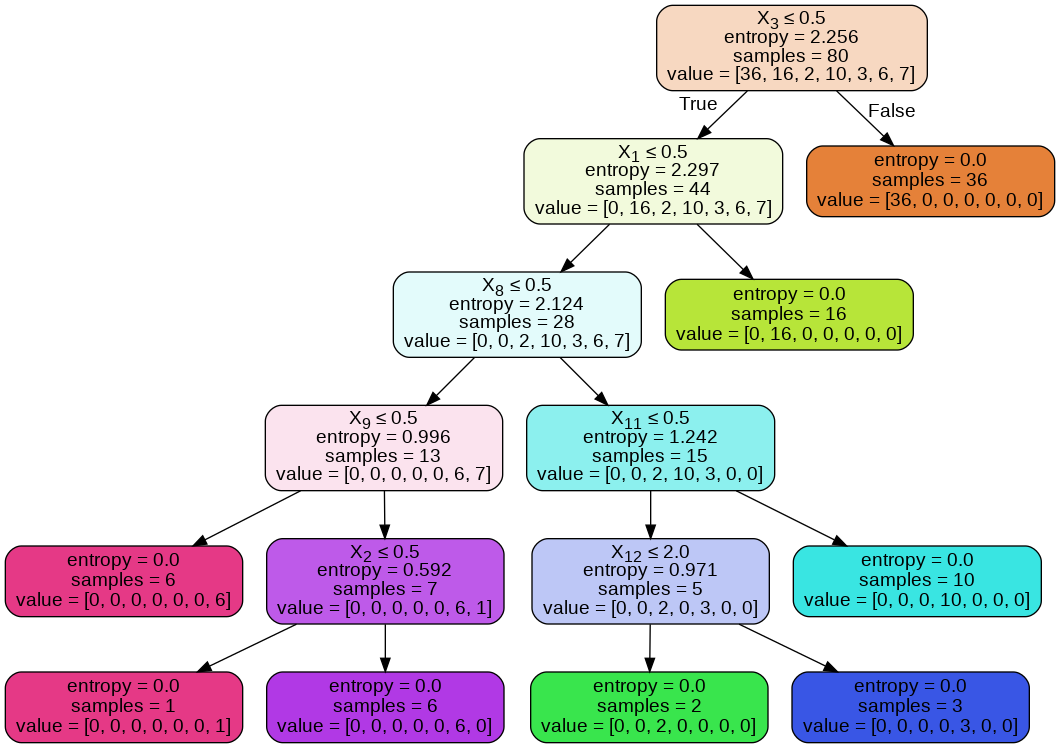

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Exercise 1: Try different combination of features and train new decision trees. What happens to accuracy? 

## Exercise 2: Try training a classifier on a different dataset of your choice

List of datasets: https://archive.ics.uci.edu/ml/index.php 
You might need to pre-process the data. 